In [49]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Netflix content overload analysis

#Business issue

Netflix has a huge global catalog of movies and TV shows. While this gives users many options, it can also create content overload — having so many choices that it becomes hard to decide what to watch.

Our goal is to use data from Netflix’s catalog to understand how its size, growth, genres, and countries contribute to content overload.

Research Questions

1. Does Netflix have more Movies or **TV Shows?
2. Which countries contribute the most titles to Netflix?
3. How has Netflix’s catalog *rown over time**?
4. What genres are the most common on Netflix?
5. What genres do Americans watch the most ?


In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [51]:
df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


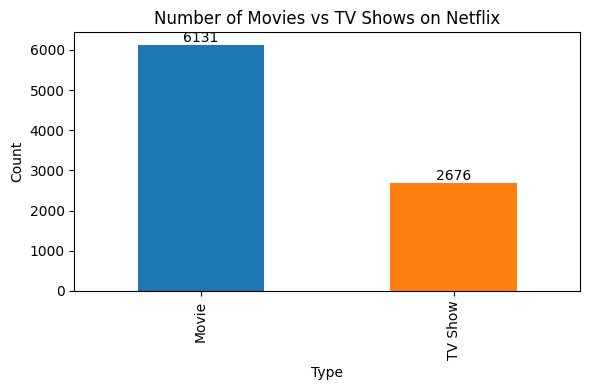

In [52]:
# Q1: Does Netflix have more Movies or TV Shows?
counts = df['type'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
ax = counts.plot(kind='bar', color=['#1f77b4','#ff7f0e'])
plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x()+p.get_width()/2., p.get_height()),
                 ha='center', va='bottom')
plt.tight_layout()
plt.show()


# Netflix by far has more movies


# most moives

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


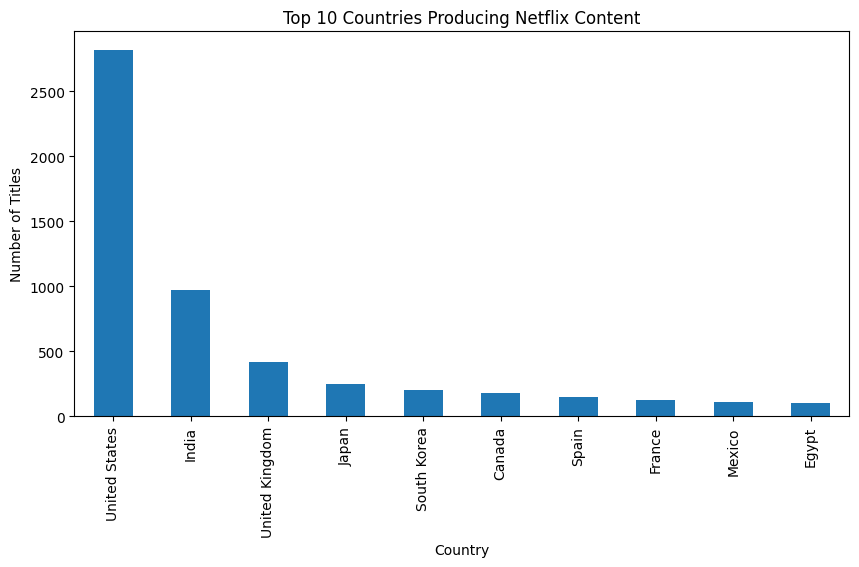

In [53]:
# Top 10 countries by number of titles
print(df['country'].value_counts().head(10))

df['country'].value_counts().head(10).plot(
    kind='bar',
    figsize=(10,5),
    title='Top 10 Countries Producing Netflix Content',
    xlabel='Country',
    ylabel='Number of Titles'
)
plt.show()


# The Untied States produces the most content on netflix as india a close second.

# Q3: How has Netflix's catalog grown over time?


year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


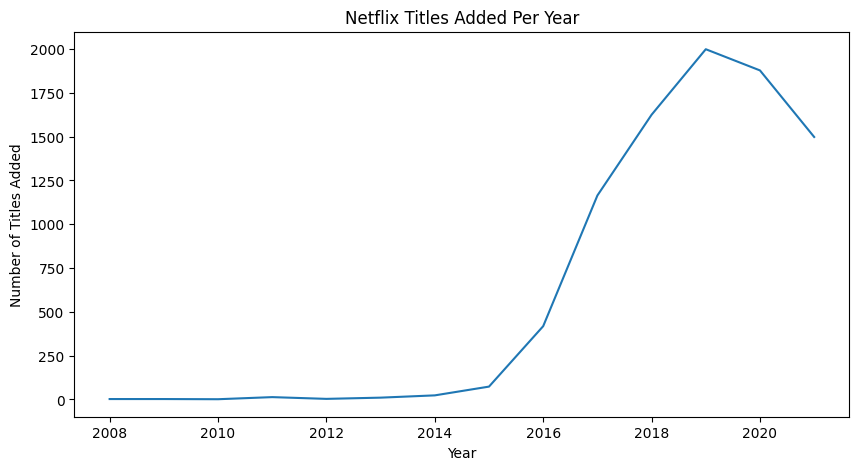

In [54]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Titles added per year
print(df['year_added'].value_counts().sort_index())

df['year_added'].value_counts().sort_index().plot(
    kind='line',
    figsize=(10,5),
    title='Netflix Titles Added Per Year',
    xlabel='Year',
    ylabel='Number of Titles Added'
)
plt.show()


### Insight:
Netflix's catalog grew slowly at first, then spiked between about 2017 and 2020. This rapid growth over a short time period greatly increased the number of choices users see, which is a major driver of content overload. Content overload became more common in the later 2010's. As it wasnt a issue in the late 2000's


# Q4: What are the most common genres on Netflix?


International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Name: count, dtype: int64


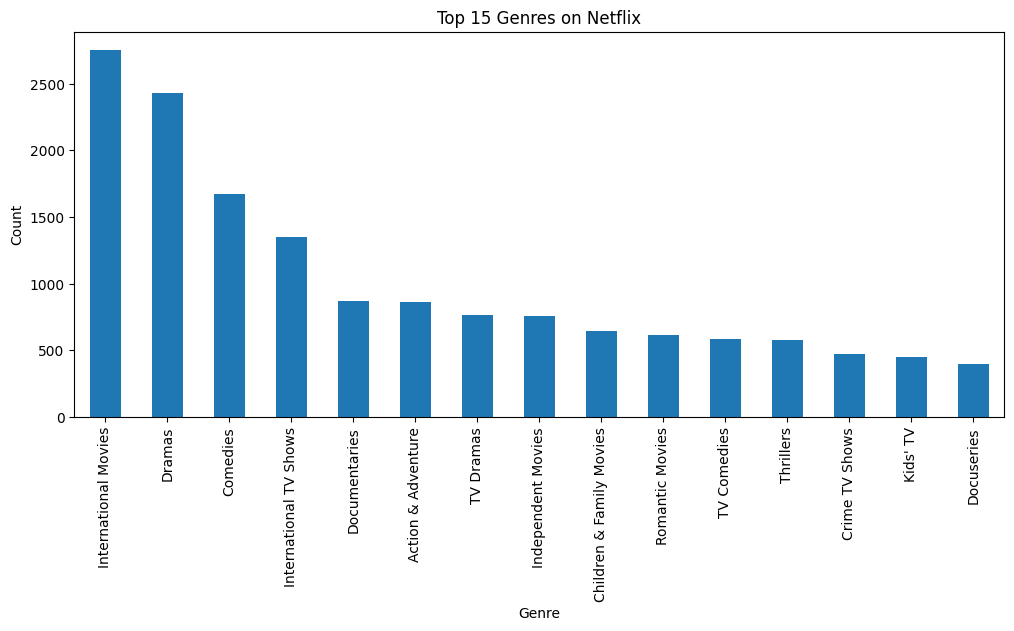

In [55]:
# Split the listed_in column into individual genres
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts()

print(genres.head(15))

genres.head(15).plot(
    kind='bar',
    figsize=(12,5),
    title='Top 15 Genres on Netflix',
    xlabel='Genre',
    ylabel='Count'
)
plt.show()


## Q5: What genres do Americans watch the most?



Dramas                      835
Comedies                    680
Documentaries               512
Action & Adventure          404
Children & Family Movies    390
Independent Movies          390
Thrillers                   292
TV Comedies                 258
TV Dramas                   232
Romantic Movies             225
Stand-Up Comedy             216
Kids' TV                    214
Horror Movies               201
Docuseries                  192
Sci-Fi & Fantasy            181
Name: count, dtype: int64


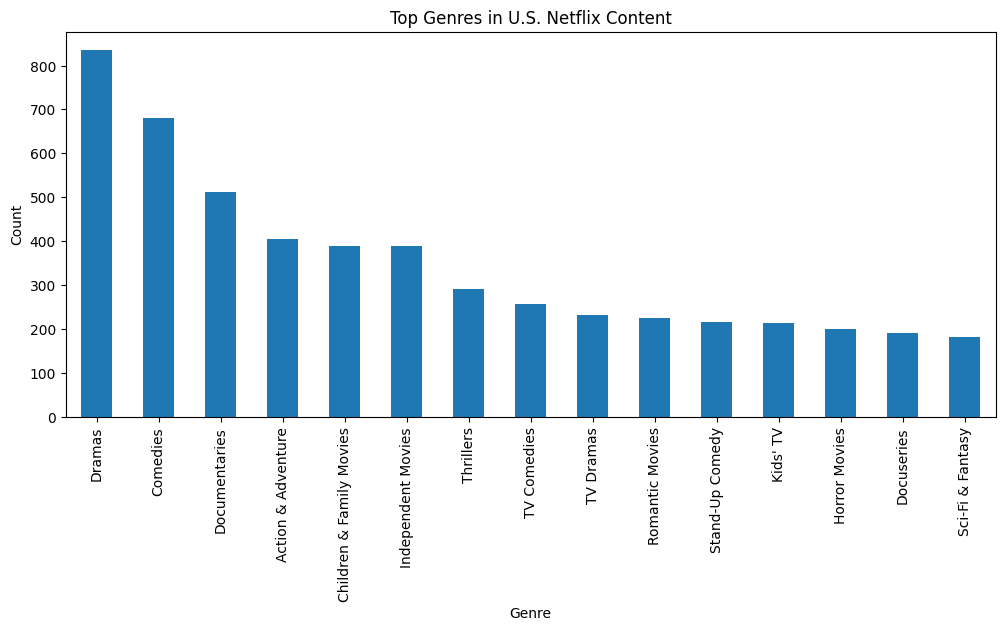

In [56]:
# Filter to titles that include United States in country
us_titles = df[df['country'].str.contains("United States", na=False)]

# Get genres for U.S. titles
us_genres = us_titles['listed_in'].str.split(', ', expand=True).stack().value_counts()

print(us_genres.head(15))

us_genres.head(15).plot(
    kind='bar',
    figsize=(12,5),
    title='Top Genres in U.S. Netflix Content',
    xlabel='Genre',
    ylabel='Count'
)
plt.show()


# Overall Summary and Conclusion

From this analysis, we see several reasons why Netflix users experience *content* overload**:

- Netflix has far more Movies than TV Shows, giving users many more movie choices to sort through.
- Most content comes from a few countries (especially the United States  and India), which can make the catalog feel less diverse.
- There was a rapid spike in new titles added between  2017–2020, which quickly increased the size of the catalog.
 A few genres such as  Dramas, Documentaries 
 
 For U.S. content,  Dramas ,  Comedies, and Documentaries are the most common, strongly influencing what Americans see and watch.

Conclusion 
Netflix is demanding audience is the main cause of rapid growth, this study was to condut the stats about the types of charts. 